# Linear Regression in Python using sklearn

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [188]:
data = pd.read_csv('Fish.csv')
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Visualizing the data

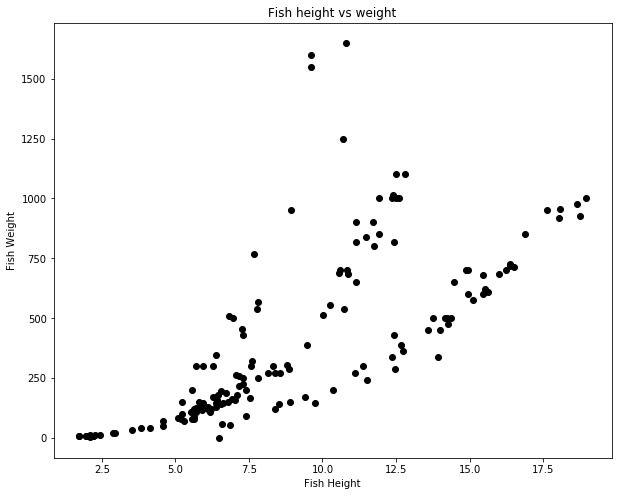

In [189]:
x = data.iloc[:, 5:6].values #fish height
y = data.iloc[:, 1].values #fish weight

fig = plt.figure(figsize=(10,8))

plt.scatter(x,y, color = "black")
plt.title('Fish height vs weight')
plt.xlabel('Fish Height')
plt.ylabel('Fish Weight')
plt.show()

### Build a Linear model from scratch

<img src="lr.png" style="height:200px">

Image from: https://pub.towardsai.net/understanding-the-simple-maths-behind-simple-linear-regression-3ce4a30e7602

In [167]:
# mean of our inputs and outputs
mean1 = np.mean(x) #mean for the x value
mean2 = np.mean(y)#mean for the y value
n = len(x)

#Solve for Y
numerator = 0
denominator = 0
for i in range(n):
    numerator += (x[i] - mean1) * (y[i] - mean2)
    denominator += (x[i] - mean1) ** 2
    
b1 = numerator / denominator
b0 = mean2 - (b1 * mean1)
print(b1, b0)

[60.49635121] [-144.38597115]


Yhat equation

### Linear regression line on the fish dataset

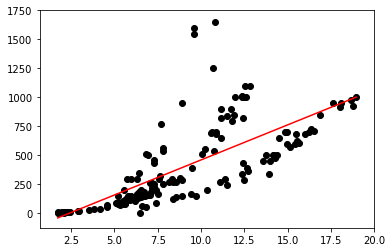

In [191]:
x_max = np.max(x) 
x_min = np.min(x) 
x2 = np.linspace(x_min, x_max, n)
yhat = b0 + b1*x2

plt.plot(x2, yhat, color='red')
plt.scatter(x, y, color='black')
plt.show()

### Let's now impliment sklearn to build a new regression model and compare it to the one we made from scratch.

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [193]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
predictor = regressor.predict(x_test)

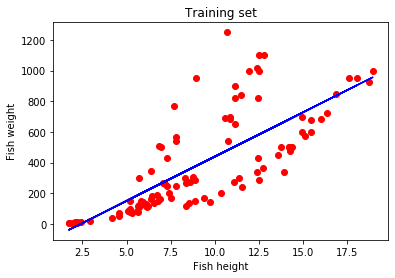

In [202]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Training set')
plt.xlabel('Fish height')
plt.ylabel('Fish weight')
plt.show()

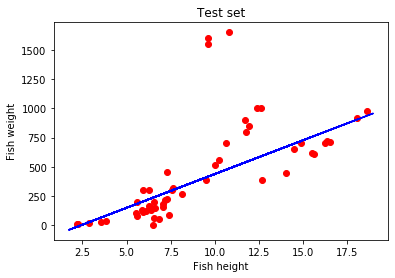

In [203]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Test set')
plt.xlabel('Fish height')
plt.ylabel('Fish weight')
plt.show()

References: 

https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a
https://www.udemy.com/course/machinelearning/learn